# Showwcase User Engagement Analysis

## Import necessary packages

In [184]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from scipy import stats
from pylab import rcParams
import matplotlib.dates as mdate
from matplotlib.pyplot import MultipleLocator

rcParams['figure.figsize'] = (20, 8)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# from sklearn.preprocessing import scale 
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
import datetime as dt

## Part 1. Data preprocessing 

## 1.1 - Load data

In [185]:
user_data = pd.read_excel('/Users/miaaa/Desktop/showwcase_sessions.xls')
user_data

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,active_time
0,109787,43096,2019-10-01,True,False,False,True,False,1,0.0,0,936,0,1172,236
1,582997,80746,2019-10-01,True,False,True,True,False,2,0.0,5,159,0,916,757
2,811956,14354,2019-10-01,True,False,False,True,False,2,0.0,0,1362,0,866,866
3,183387,29375,2019-10-01,True,False,False,True,False,2,0.0,0,518,0,2140,1622
4,944212,40572,2019-10-01,True,True,False,True,False,3,13.0,0,1174,0,2255,1081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,750269,40235,2019-10-30,True,True,False,True,False,3,16.0,0,1405,0,1679,274
296,744943,73245,2019-10-30,True,True,True,True,True,3,27.0,5,1746,4,1490,1490
297,922001,12407,2019-10-30,True,False,True,False,False,5,0.0,5,0,0,1329,1329
298,823895,29375,2019-10-30,False,False,True,True,False,0,0.0,5,2474,0,1875,1875


## 1.2 - Data cleaning 

First of all, I found out there have some redundant and useless features, so I will remove the ones with the boolean type. 

Since the information with only false and true value is unclear, and the value of false actually means "zero" in the another feature. 

(e.g, projects_added: "false" value = session_projects_added "zero" value.)

Below are the duplicated features. 

- session_projects_added v.s. projects_added
- session_likes_given v.s. likes_given
- session_comments_given v.s. comment_given
- inactive_duration v.s. inactive_status
- bugs_in_session v.s. bug_occurerd

In [186]:
# Drop the redundant columns. 

user_data.drop(['projects_added', 'likes_given', 'comment_given', 'inactive_status', 'bug_occured'], axis = 1, inplace = True)
user_data

,session_id,customer_id,login_date,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration,active_time
0,109787,43096,2019-10-01,1,0.0,0,936,0,1172,236
1,582997,80746,2019-10-01,2,0.0,5,159,0,916,757
2,811956,14354,2019-10-01,2,0.0,0,1362,0,866,866
3,183387,29375,2019-10-01,2,0.0,0,518,0,2140,1622
4,944212,40572,2019-10-01,3,13.0,0,1174,0,2255,1081
...,...,...,...,...,...,...,...,...,...,...
295,750269,40235,2019-10-30,3,16.0,0,1405,0,1679,274
296,744943,73245,2019-10-30,3,27.0,5,1746,4,1490,1490
297,922001,12407,2019-10-30,5,0.0,5,0,0,1329,1329
298,823895,29375,2019-10-30,0,0.0,5,2474,0,1875,1875


Check missing value. 

In [187]:
# Counts all missing values.
total = user_data.isnull().sum().sort_values(ascending = False)
frames = [total]
# pd.concat(): axis=0 means index, axis=1 means column, keys = name of the column.
missing_data = pd.concat(frames, axis = 1, keys = ['Total'])
missing_data

,Total
session_likes_given,1
active_time,0
session_duration,0
bugs_in_session,0
inactive_duration,0
session_comments_given,0
session_projects_added,0
login_date,0
customer_id,0
session_id,0


In [188]:
# Drop null data of TotalCharges
user_data.dropna(axis = 0, inplace = True)

# Check the number of missing values.
user_data.isnull().sum().max

<bound method Series.max of session_id                0
customer_id               0
login_date                0
session_projects_added    0
session_likes_given       0
session_comments_given    0
inactive_duration         0
bugs_in_session           0
session_duration          0
active_time               0
dtype: int64>

In [189]:
user_data.drop(['inactive_duration'], axis = 1, inplace = True)

## 1.3 - Summary statistics of the numeric variables

In [193]:
numeric_data = user_data.drop(['customer_id', 'session_id', 'session_duration'], axis = 1)
numeric_data.describe()

,session_projects_added,session_likes_given,session_comments_given,bugs_in_session,active_time
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,1.618729,10.458194,2.408027,1.237458,955.030100
std,1.336799,9.474839,2.251190,1.759100,652.736385
min,0.000000,0.000000,0.000000,0.000000,4.000000
25%,1.000000,0.000000,0.500000,0.000000,373.000000
50%,2.000000,9.000000,2.000000,0.000000,893.000000
75%,3.000000,19.000000,4.000000,2.500000,1469.000000
max,9.000000,27.000000,21.000000,5.000000,2381.000000


The standard deviation is high in active time, indicates that the values are spread out over a wider range.

The reason may because of the small dataset, and the concern is that the more variability in the sample, the higher the chances of error, 

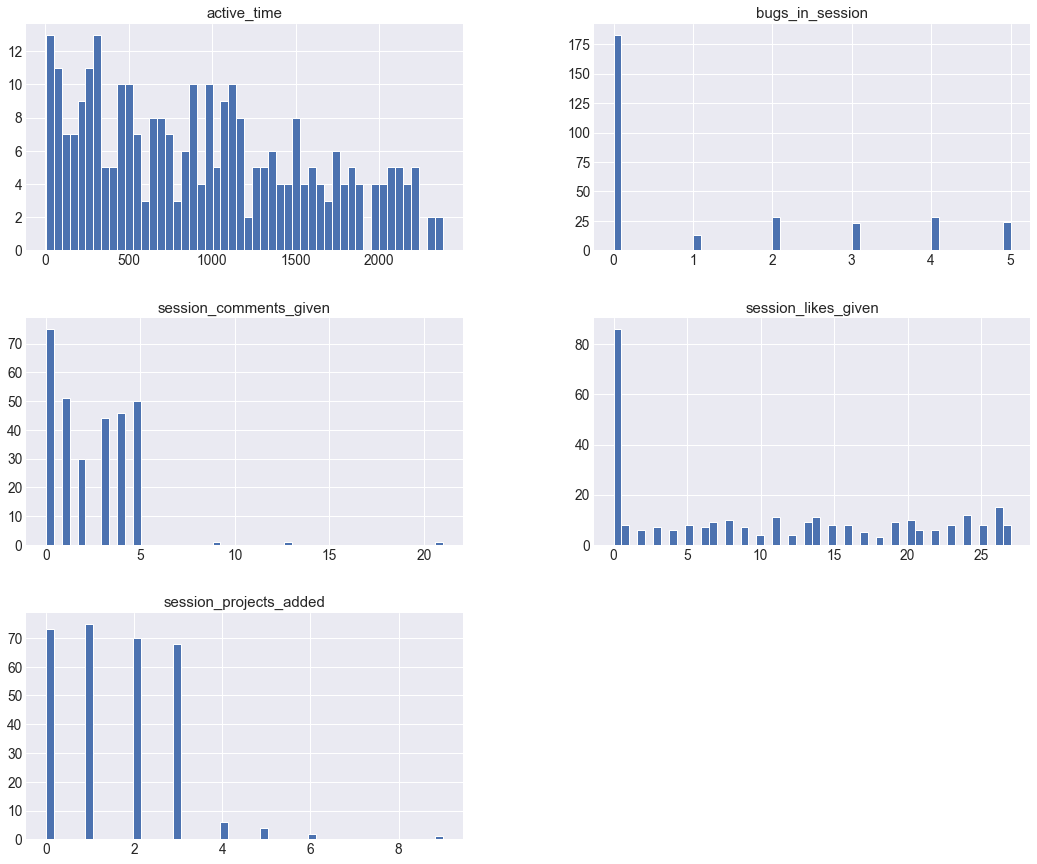

In [191]:
numeric_data.hist(bins = 50, figsize= (18, 15))
plt.show()

## Part 2. Product success definition and user engagement analysis 

## 2.1 - Picking the user engagement metric - amount of active time

First of all, Showcase's goal is to build a platform that encourages users to share, exchange ideas, connect, and learn from other users.

Therefore, there's an increasing need to better understand how users engage with the products and services.

Specifically we should determine:

- Understand what factors affect user engagement.
- Predict long-term engagement early in the customer journey.
- Design and measure the effect of interventions on improving engagement.

To do these 3 things, we need a “North Star” metric we could focus on improving.

Here, I would like to use the "active time" per user spends in our platform, within a given amount of time.

Because engagement is when our user is realizing value, the more time users spend in our product, the more engaged they are. The real active time per user indicates how well the Showcase's platform meets user expectations after they log in and over time.

## 2.2 - Overview performance and trend on active user amount and active time

## Amount of daily active user - weekdays vs. weekends 

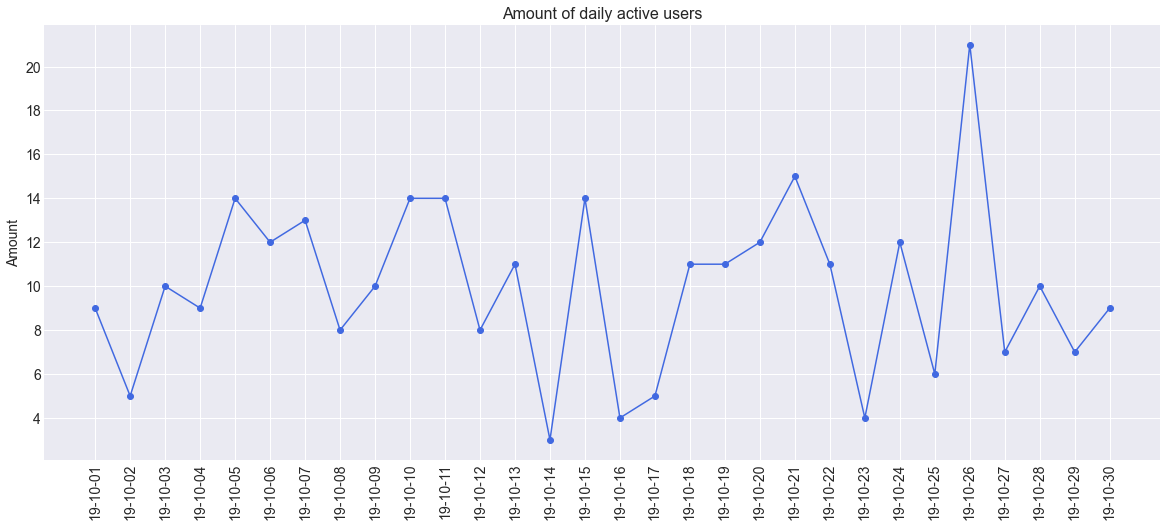

In [197]:
dau = user_data.groupby(['login_date'], as_index = False).apply(lambda user_data: 
                                                                user_data[user_data.active_time > 0])
dau_count = user_data.groupby(['login_date'], as_index = False)['customer_id'].count()
dau_count = dau.groupby(['login_date'], as_index = False)['customer_id'].count()

dau_count.set_index('login_date', inplace = True)

def plot_curve(data, title):
    fig = plt.figure(figsize = (20, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.xaxis.set_major_formatter(mdate.DateFormatter('%y-%m-%d'))
    plt.xticks(pd.date_range('2019-10-01','2019-10-30'), rotation = 90)
    plt.title(title, fontsize = 16)
    plt.plot(data, 'o-', color = 'royalblue')
    plt.ylabel('Amount', fontsize = 14)
    
    # Set the fontsize for x axis and y axis. 
    ax.tick_params(axis = 'y', labelsize = 14)
    ax.tick_params(axis = 'x', labelsize = 14)
    
    y_major_locator=MultipleLocator(2)
    ax.yaxis.set_major_locator(y_major_locator)
    plt.show()

plot_curve(dau_count,'Amount of daily active users')

Observations:

- On average, the number of active users is 10, but there's a peak on 10/26, we can analyze the factors in the following sections. 
- Once a peak reached, the number of active users decreased significantly in the next day. 

## Active users average engaged activities

We can dig into what active users engaged most everyday.

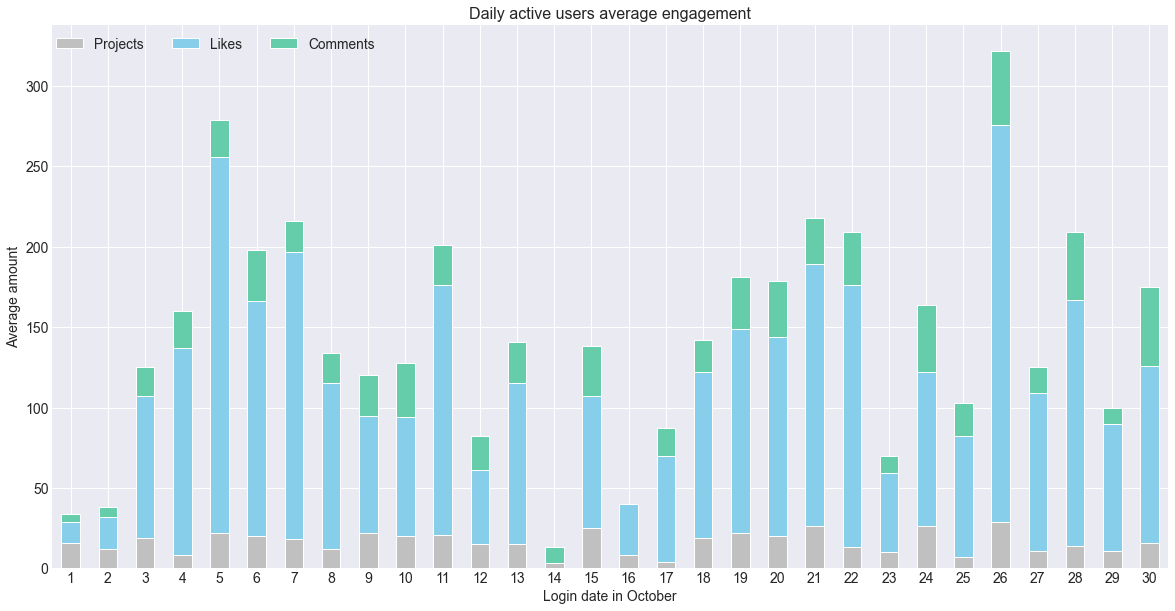

In [202]:
activity = dau.groupby(['login_date'], as_index = False)[['session_projects_added', 'session_likes_given', 'session_comments_given']].sum()
start = pd.to_datetime("10-01-2019")
idx = pd.date_range(start, periods = 30).tolist()
activity.set_index('login_date', inplace = True)

ticklabels = list(range(1, 31))
# ticklabels
ax = activity.plot.bar(stacked = True, figsize = (20, 10), color = ("silver", "skyblue", "mediumaquamarine"))
    #b1d1fc
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
# plt.xticks(pd.date_range('2019-10-01','2019-10-30'), rotation = 90)

# Set the title name and font size. 
ax.set_title("Daily active users average engagement", fontsize = 16)

# Set the fontsize for x axis and y axis. 
ax.tick_params(axis = 'y', labelsize = 14)
ax.tick_params(axis = 'x', labelsize = 14)

plt.legend(['Projects', 'Likes', 'Comments'])

ax.set_ylabel('Average amount', fontsize = 14)
ax.set_xlabel('Login date in October', fontsize = 14)

for tick in ax.get_xticklabels():
    tick.set_rotation(0)

ax.legend(bbox_to_anchor = (0.3, 1), ncol = 3, labels = ['Projects', 'Likes', 'Comments']) 



Above graph summarizes the total number of comments, likes, and projects posted everyday.
As expected, a lot of engagements occured on 10/5 and 10/26, which coincide with the relatively high user log-ins. 

We found that 10/5 and 10/26 fall on a weekend (Saturday), whereas the lowest engagement days, 10/14 falls on a weekday (Monday). 

That explains that having more spare times on Saturday, users are generally more involved in our platform, while the behavior shows the low frequency, most of users don't active in daily spurts –  which again explains for the peak and trough.

Now, we can breakdown this analysis to see what engagement affects the user's active time most. 

## 2.3 - Understand what factors influence the different level of active users

## Breakdown to each level of active users based on their active time

The following steps cluster the user into 4 levels of active time:

- Inactive user: active time is zero in one session.
- Low active user: active time is shorten than 5 minutes (300 seconds) in one session.
- Medium active user: active time is longer than 5 minutes, but shorten than 20 minutes (1200 seconds) in one session.
- High active user: active time is longer than 20 minutes in one session.

In [203]:
def active_user(val):
    if val != 0 and val < 300:
        return "Low"
    elif val > 300 and val < 1200:
        return "Medium"
    else:
        return "High"

user_data["active_user_level"] = user_data.apply(lambda x: active_user(x["active_time"]), axis = 1)
user_data

,session_id,customer_id,login_date,session_projects_added,session_likes_given,session_comments_given,bugs_in_session,session_duration,active_time,active_user_level
0,109787,43096,2019-10-01,1,0.0,0,0,1172,236,Low
1,582997,80746,2019-10-01,2,0.0,5,0,916,757,Medium
2,811956,14354,2019-10-01,2,0.0,0,0,866,866,Medium
3,183387,29375,2019-10-01,2,0.0,0,0,2140,1622,High
4,944212,40572,2019-10-01,3,13.0,0,0,2255,1081,Medium
...,...,...,...,...,...,...,...,...,...,...
295,750269,40235,2019-10-30,3,16.0,0,0,1679,274,Low
296,744943,73245,2019-10-30,3,27.0,5,4,1490,1490,High
297,922001,12407,2019-10-30,5,0.0,5,0,1329,1329,High
298,823895,29375,2019-10-30,0,0.0,5,0,1875,1875,High


## Distribution of project added in each active user level

Text(0.5, 1.0, 'Distribution of project added in each active user level')

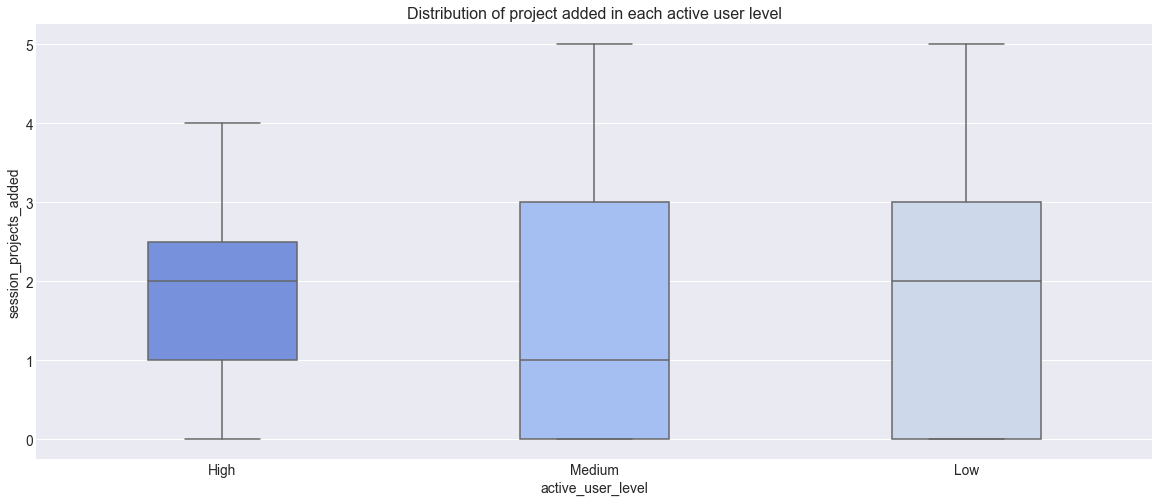

In [206]:
# Create a boxplot.
user_data = user_data.sort_values(by = 'active_time', ascending = False)
ax = sns.boxplot(y = 'session_projects_added', x = "active_user_level", 
                 data = user_data, showfliers = False, palette = sns.color_palette('coolwarm'), width = 0.4)

ax.set_xlabel('active_user_level', fontsize = 14)
ax.set_ylabel('session_projects_added', fontsize = 14)
ax.set_title('Distribution of project added in each active user level', fontsize = 16)

For the median amount of projects added, the high active users only added 2 projects and are the same as a low active user. That explains that the high active users on our platform don't usually spend time on adding projects.

## Correlation of projects added and active time in each active user level

[None, None]

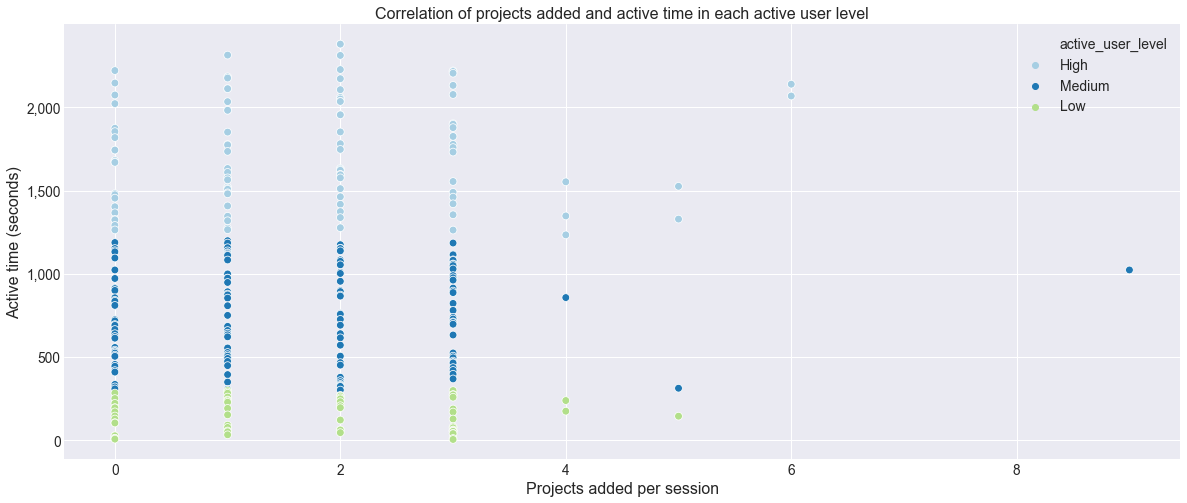

In [208]:
# Set the plot size.
rcParams['figure.figsize'] = (20, 8)

# Create a scatterplot. 
ax = sns.scatterplot(x = 'session_projects_added', y = 'active_time', data = user_data, hue = 'active_user_level', s = 60, palette = sns.color_palette('Paired', n_colors = 3))

# Set x and y lable name and the title of this scatterplot.
ax.set_xlabel('Projects added per session', fontsize = 16)
ax.set_ylabel('Active time (seconds)', fontsize = 16)
ax.set_title('Correlation of projects added and active time in each active user level', fontsize = 16)

fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Set font size for legend text and title.
plt.setp(ax.get_legend().get_texts(), fontsize = 14) 
plt.setp(ax.get_legend().get_title(), fontsize = 14)

For high active users, there are 2 sessions that have 6 projects added, it indicates that the more time they activate, the more project was added than other users. However, there are only 2 points, that cannot be explained all in this phenomenon.

## Correlation of likes given and active time in each active user level

[None, None]

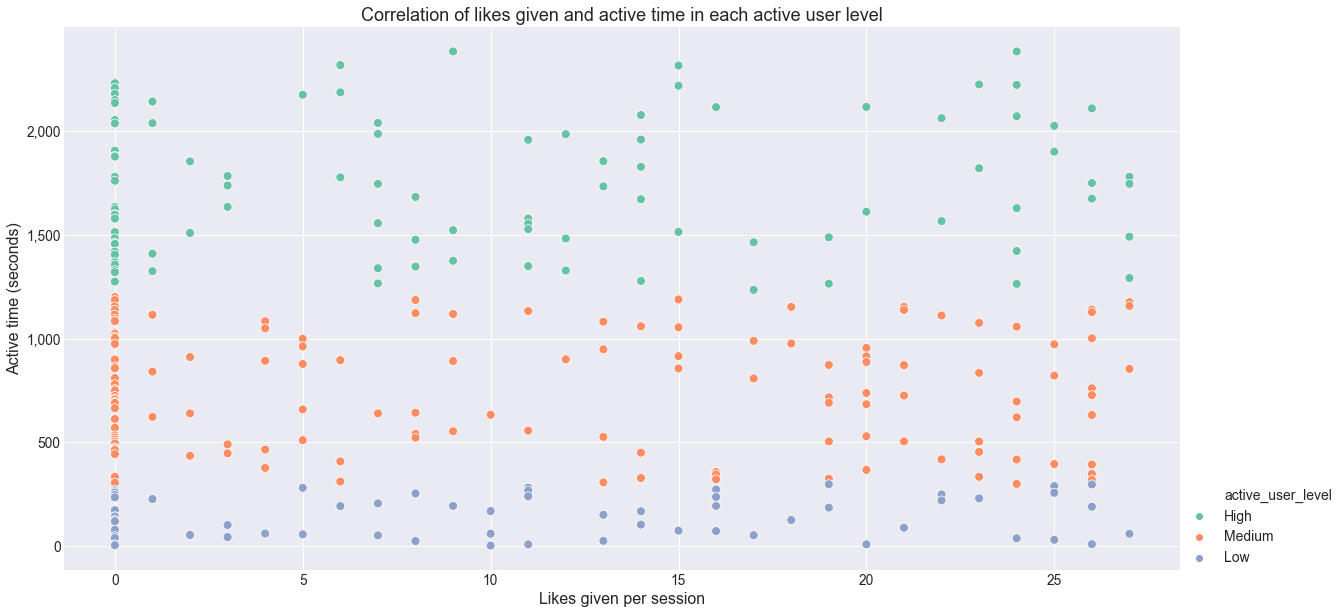

In [214]:
# Set the plot size.
rcParams['figure.figsize'] = (20, 10)

# Create a scatterplot. 
ax = sns.scatterplot(x = 'session_likes_given', y = 'active_time', data = user_data, hue = 'active_user_level', s = 80, palette = sns.color_palette('Set2', n_colors = 3))

# Set x and y lable name and the title of this scatterplot.
ax.set_xlabel('Likes given per session', fontsize = 16)
ax.set_ylabel('Active time (seconds)', fontsize = 16)
ax.set_title('Correlation of likes given and active time in each active user level', fontsize = 18)

fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.legend(bbox_to_anchor = (1, 0), loc = 3, borderaxespad = 0)
# Set font size for legend text and title.
plt.setp(ax.get_legend().get_texts(), fontsize = 14) 
plt.setp(ax.get_legend().get_title(), fontsize = 14)

We see that there is no significant difference between the active times of likes given and the level of active users.

## Correlation of comments given and active time in each active user level

[None, None]

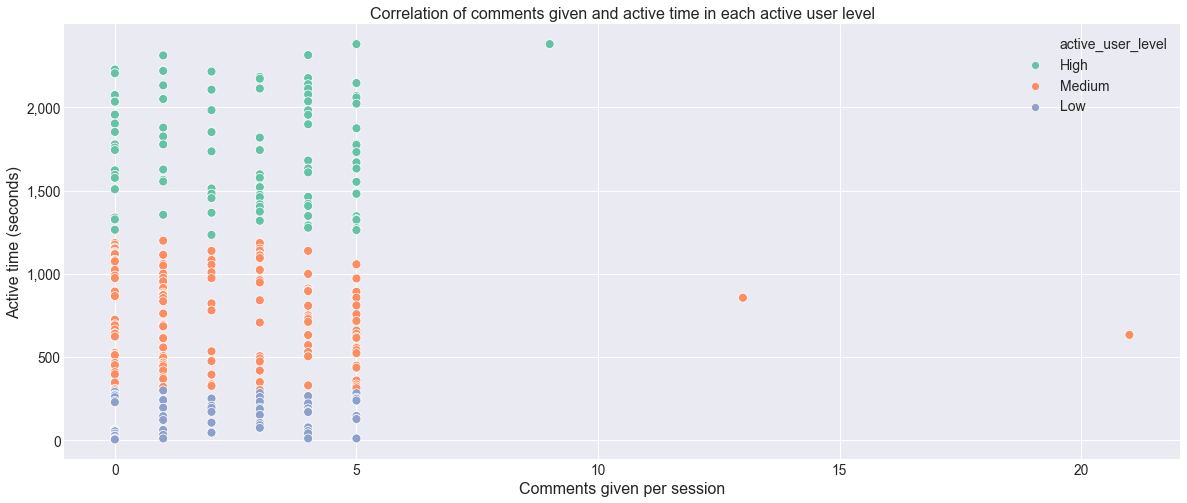

In [221]:
# Set the plot size.
rcParams['figure.figsize'] = (20, 8)

# Create a scatterplot. 
ax = sns.scatterplot(x = 'session_comments_given', y = 'active_time', data = user_data, hue = 'active_user_level', 
                     s = 80, palette = sns.color_palette('Set2', n_colors = 3))

# Set x and y lable name and the title of this scatterplot.
ax.set_xlabel('Comments given per session', fontsize = 16)
ax.set_ylabel('Active time (seconds)', fontsize = 16)
ax.set_title('Correlation of comments given and active time in each active user level', fontsize = 16)

fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# plt.legend(bbox_to_anchor = (1, 0), loc = 3, borderaxespad = 0)
# Set font size for legend text and title.
plt.setp(ax.get_legend().get_texts(), fontsize = 14) 
plt.setp(ax.get_legend().get_title(), fontsize = 14)

It seems like there is no significant difference between the active times of likes given and the level of active users. Because the median active users gace more comments than the high active users.

## Overall correlation map - what factors correlate to the active time most?

Check the correlation between features. 

Text(0.5, 1.0, 'Correlation map')

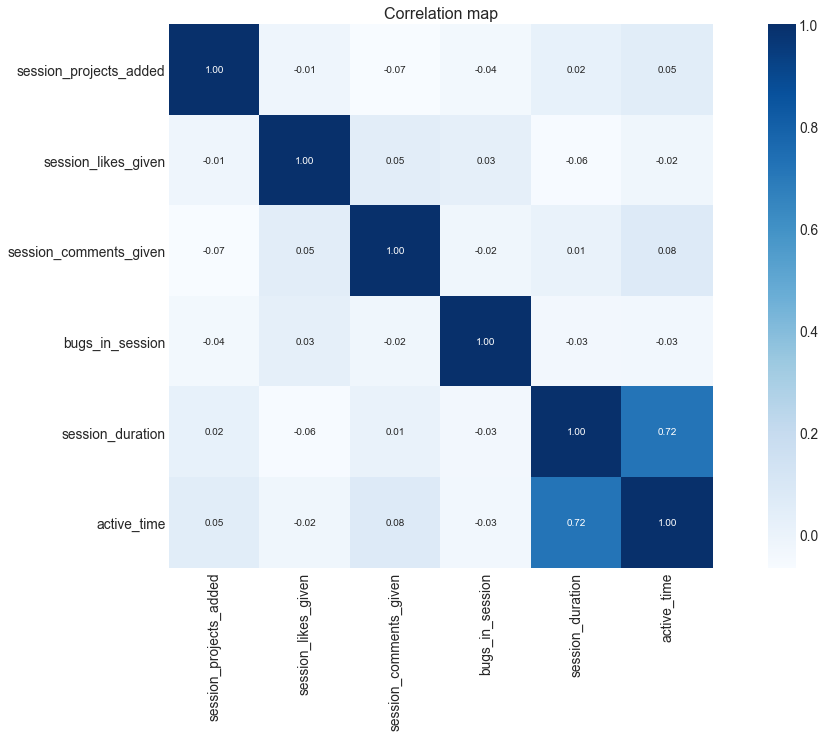

In [222]:
drop_date = user_data.drop(['login_date', 'session_id', 'customer_id'], axis = 1)

# Compute correlation matrix. 
corrmatrix = drop_date.corr()

# Reset size.
plt.rcParams['figure.figsize'] = (20, 10)

# Plot a heatmap. 
hm = sns.heatmap(corrmatrix, square = True, annot = True, cmap = 'Blues', fmt = '.2f', annot_kws = {'size':10})
sns.set(font_scale = 1.25)

plt.title("Correlation map", fontsize = 16)

There is no strong correlation between each feature, except for the active time and session duration. 

However, this is not valid, as I created the active time feature based on session duration. 

## Part 3. Conclusion on discovered insights, problems and follow-up works  

## Discovered Insights 

We have defined an engagement metric as "active time" per user spends in our platform, within a given amount of time. Based on this, we have discovered below insights.

1. There were a lot of likes, comments, and projects posted on 10/24, which we determined happen to be Saturday, while not every weekend days follow this pattern. Perhaps there has other factors influenced the engagement on that day. 
2. For the median amount of projects added, the high active users only added 2 projects and are the same as a low active user. That explains that the high active users on our platform don't usually spend time on adding projects.
2. There's no linear relationship or any other correlation between the active times and likes given / comments given. It does not indicate that the more likes / comments given, the more active time does. 


## Problems

1. Small sample size: 

Small dataset reduces the power of this study. A study with low statistical power has a reduced chance of detecting a true effect. Additionally, to increase the accuracy on understanding what factors influence the active time, we should use the machine learning technique of building Random Forest model to extract the feature importances by evaluating the correlation value. However, it is hard to build the model due to the small dataset. It is hard to split data into training and testing dataset, and the small dataset will cause the issue with high variance. It means the model fits the training data well, but it does not generalize well on out of training datasets.


2. Possibility of other features affected the user active time:

   - Click through rate of projects / articles: Count the click when a signed-in member clicks on the specific article, user portfolio. Although it does not include other interactions like shares, reactions or comments, it affects the active time. For example, we can identify that most of our users are active because of interested in reading various articles or viewing other users' portfolios.  

   - Login time: different times of day mat affect the user active time. For example, nighttime may be the peak, and most users won't engage in the platform during the daytime.
   
   - Marketing promotion: there might have some e-mail marketing or commercial message influence the users visit, or some job applications might force candidates to build their portfolios on our platform, which influences the active time.
   
   - Number of following / followers: the more following / followers may cause the longer active time. 


## Follow-up works

To improve above problems, I have below recommendations. 

- Collect more sample and additional features to determine what factors influence the user active time.
- Use Random Forest model to examine the feature importances, as well as predicting the active time. 
- Plot the partial dependece plot to show how the predictions partially depend on values of the input variables of interest.

We can measure this active time metric when conducting different experiments, such as A/B testing on increasing/update the feature, or business performance monitoring, etc. 

Furthermore, if we have collected more data and features, we can calculate update engagement rate by adding the number of interactions, clicks, and new followers acquired, divided by the number of impressions the post receives. 